In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Dataset of Diabetes .csv')  # Adjust filename if needed

# Display first few rows
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [9]:
print(df.columns)

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')


C:\Users\Ish\AppData\Local\Temp\ipykernel_2284\656819712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLASS', palette='Set2')


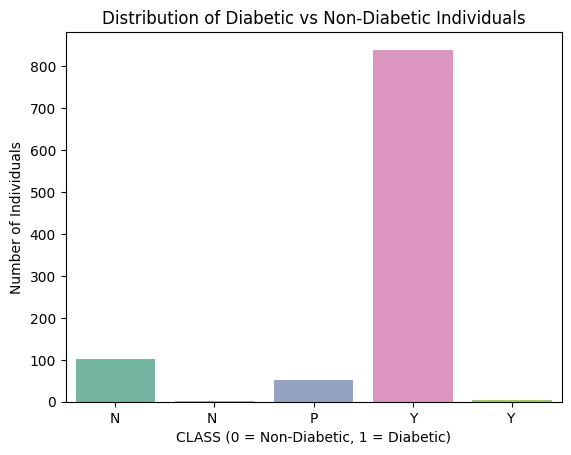

In [10]:
# Count plot using 'CLASS' column
sns.countplot(data=df, x='CLASS', palette='Set2')
plt.title('Distribution of Diabetic vs Non-Diabetic Individuals')
plt.xlabel('CLASS (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Number of Individuals')
plt.show()


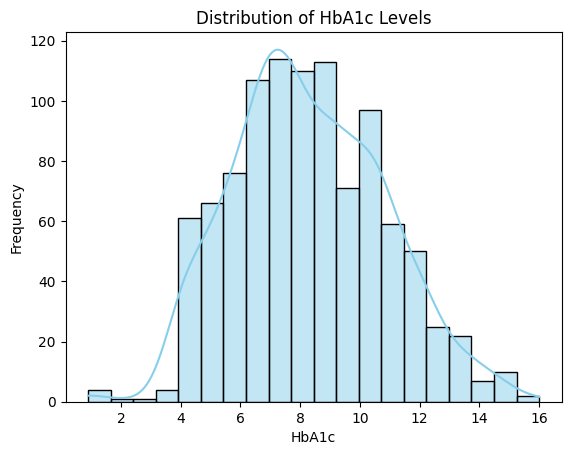

In [12]:
sns.histplot(df['HbA1c'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of HbA1c Levels')
plt.xlabel('HbA1c')
plt.ylabel('Frequency')
plt.show()


C:\Users\Ish\AppData\Local\Temp\ipykernel_2284\580608831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CLASS', y='BMI', data=df, palette='pastel')


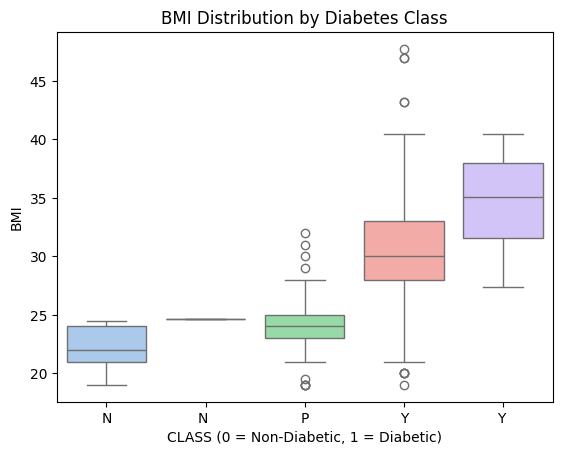

In [13]:
sns.boxplot(x='CLASS', y='BMI', data=df, palette='pastel')
plt.title('BMI Distribution by Diabetes Class')
plt.xlabel('CLASS (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('BMI')
plt.show()

C:\Users\Ish\AppData\Local\Temp\ipykernel_2284\1127178876.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_chol = df.groupby('AgeGroup')['Chol'].mean().reset_index()
C:\Users\Ish\AppData\Local\Temp\ipykernel_2284\1127178876.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Chol', data=avg_chol, palette='Blues_d')


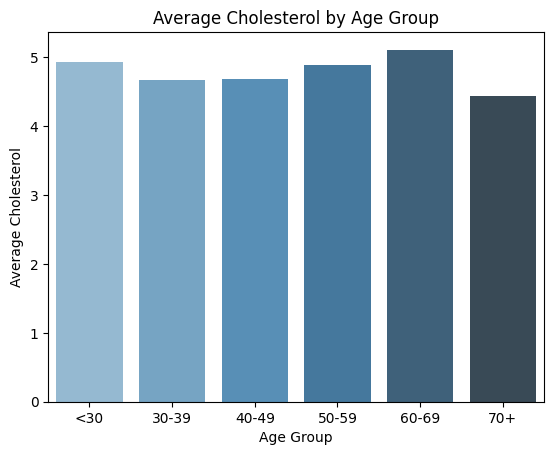

In [14]:
# Create Age Groups
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['AGE'], bins=bins, labels=labels)

# Average cholesterol per age group
avg_chol = df.groupby('AgeGroup')['Chol'].mean().reset_index()

# Bar Plot
sns.barplot(x='AgeGroup', y='Chol', data=avg_chol, palette='Blues_d')
plt.title('Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol')
plt.show()


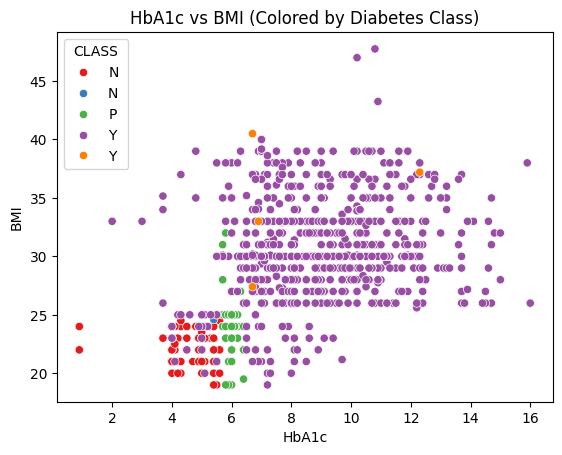

In [15]:
sns.scatterplot(data=df, x='HbA1c', y='BMI', hue='CLASS', palette='Set1')
plt.title('HbA1c vs BMI (Colored by Diabetes Class)')
plt.xlabel('HbA1c')
plt.ylabel('BMI')
plt.legend(title='CLASS')
plt.show()


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')

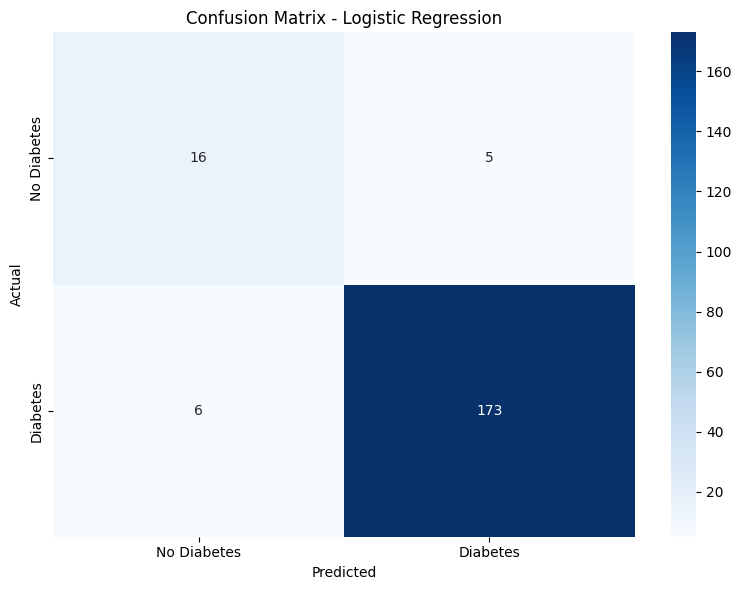

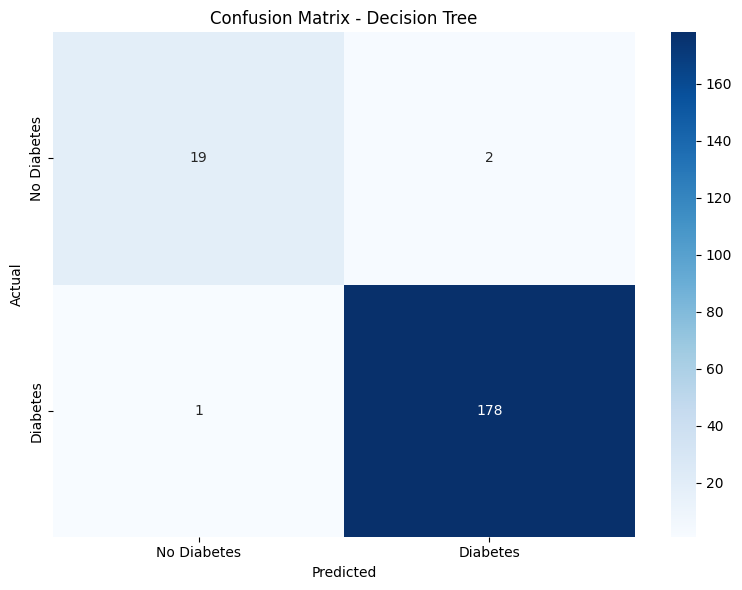

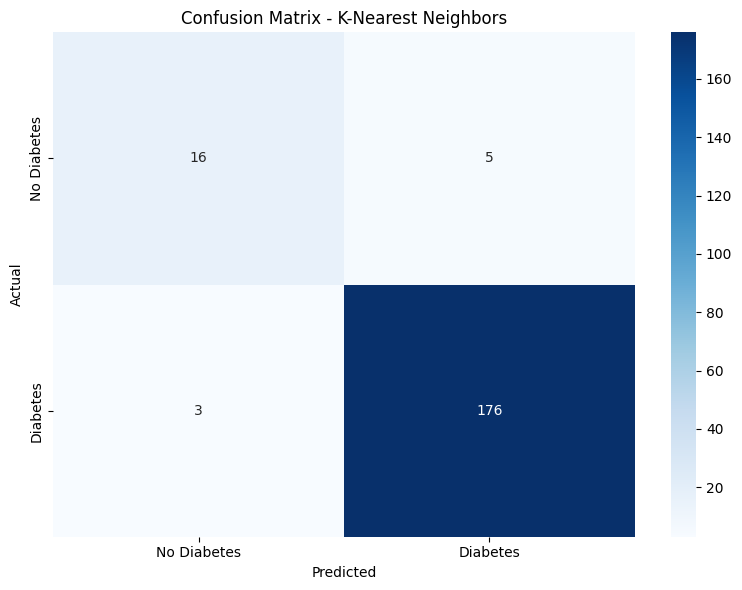

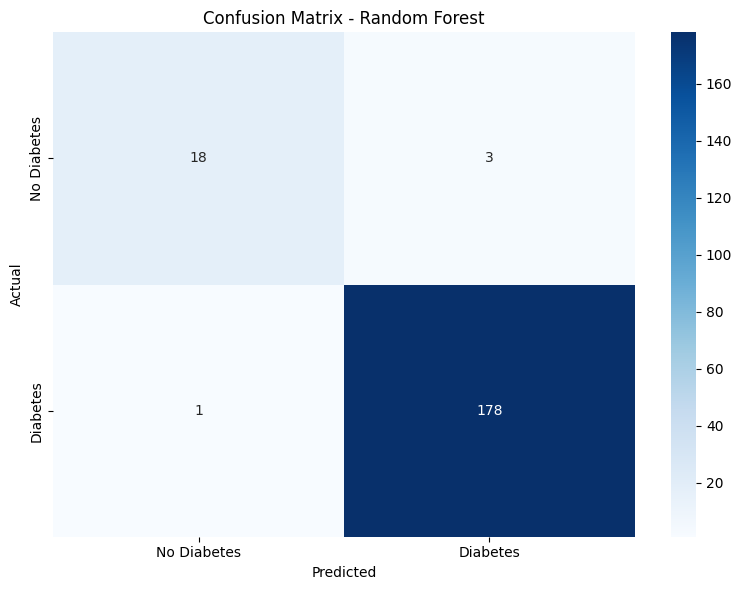


=== Logistic Regression ===
Confusion Matrix:
[[ 16   5]
 [  6 173]]
Accuracy: 0.9450
Precision: 0.9719
Recall: 0.9665
F1 Score: 0.9692

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.73      0.76      0.74        21
    Diabetes       0.97      0.97      0.97       179

    accuracy                           0.94       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.95      0.94      0.95       200



=== Decision Tree ===
Confusion Matrix:
[[ 19   2]
 [  1 178]]
Accuracy: 0.9850
Precision: 0.9889
Recall: 0.9944
F1 Score: 0.9916

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.95      0.90      0.93        21
    Diabetes       0.99      0.99      0.99       179

    accuracy                           0.98       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.98      0.98      0.98       200



=== K-Nearest Neighbors ===

In [34]:
# Load the dataset
data = pd.read_csv('Dataset of Diabetes .csv')

# Preprocess the data
# Encode 'Gender' column
le_gender = LabelEncoder()
data['Gender'] = le_gender.fit_transform(data['Gender'])

# Map 'CLASS' to binary: 'N' -> 0, 'P'/'Y' -> 1
data['CLASS'] = data['CLASS'].map({'N': 0, 'P': 1, 'Y': 1})

# Drop 'ID' and 'No_Pation' as they are identifiers
data = data.drop(['ID', 'No_Pation'], axis=1)

# Handle missing values (if any, fill with median for numerical columns)
data = data.fillna(data.median())

# Features and target
X = data.drop('CLASS', axis=1)
y = data['CLASS']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Compute metrics
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
    
    # Store results
    results[model_name] = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': report
    }
    
    # Plot and save confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Diabetes', 'Diabetes'], 
                yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_name.lower().replace(" ", "_")}.png', dpi=300)
    plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("\nClassification Report:")
    print(metrics['Classification Report'])
    print("\n" + "="*50)